# 1. Introduction

Describe the approach chosen, reason for choosing it and how you implemented it.

I wanted to impement approach 1 as i was not satisfied with the results in lab 3 and was also not satisfied with lab 2 data. So i wanted to use a controlled environment and improve my results in lab 3 and test the model in production.

## *Controlled Environment*
- used my lab2 code from `lab2_image_capture_gui.py` to capture new images with:
  - a white neural background
  - the same lighting circumstances
  - identical camera angles
  - kept only the hand in the shot 
  - increased the diversity of the validation set.
- used my lab3 code to train the model exactly except change the augmentation transform to squish as squish wont crop out fingers so added that in item_tfms
-Then used the lab 4 code to test the model 

# 2. Model training and Results
Any code to train a model and produce results or a reference to the notebook/code file.

In [2]:
!pip install -q fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from fastai.vision.all import *

In [4]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/digits')

digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files, 
                 splitter = set_seed(42),
                 get_y = parent_label,
                 item_tfms = Resize(420, 'squish'),
                 batch_tfms = aug_transforms(size=224, max_rotate = 90, max_zoom = 0.25, pad_mode= 'border'))
dls = digits.dataloaders(path, bs=32)


In [9]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(15, base_lr=2.4e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.641884,5.534129,0.478873,00:04


epoch,train_loss,valid_loss,accuracy,time
0,2.166097,1.333969,0.633803,00:07
1,1.760915,0.939609,0.788732,00:05
2,1.511568,2.184009,0.690141,00:04
3,1.455237,7.736743,0.366197,00:06
4,1.355006,1.355190,0.718310,00:04
5,1.209278,0.568122,0.816901,00:04
6,1.101725,0.695619,0.788732,00:07
7,1.034865,0.296792,0.873239,00:04
8,0.936485,0.194121,0.901408,00:04
9,0.877482,0.259009,0.929577,00:07


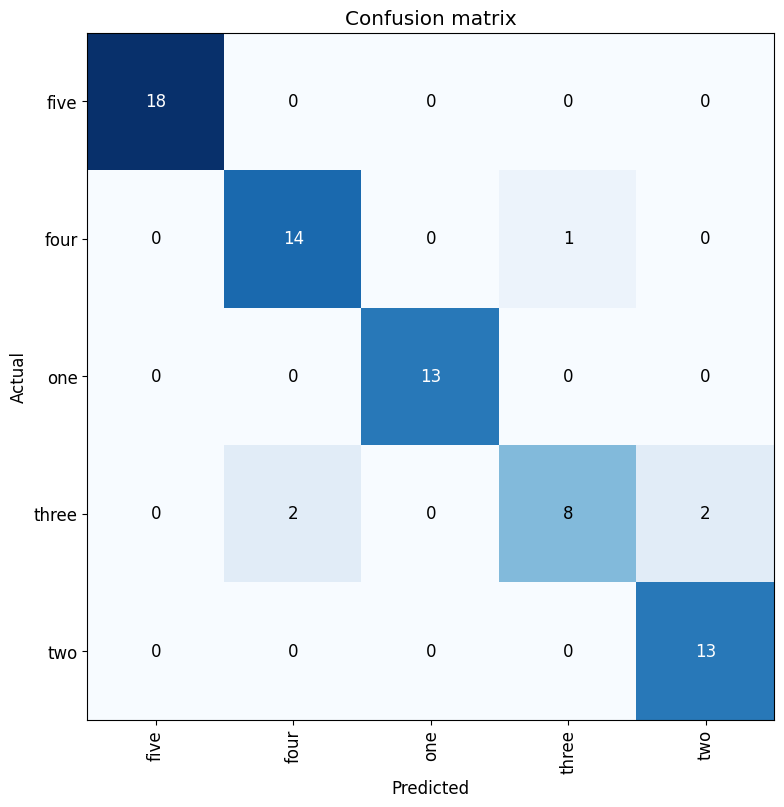

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8, 8))

In [14]:
import pandas as pd
from sklearn.metrics import *
import numpy

file = 'lab4_results.csv'
results = pd.read_csv(file)
actual = results['ACTUAL']
predicted = results['PREDICTED']
actual_digits = actual.values
predicted_digits = predicted.values
cm = confusion_matrix(actual_digits,predicted_digits)

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(actual_digits, predicted_digits,normalize=True,sample_weight = None)

print(accuracy)

0.76


# 3. Summary and Conclusion
Summarize your new results and state your lab3 and lab4 results.

The improvement is significant as the accuracy in production jumped from 0.33 in lab 4 to 0.76 now.In lab 3 the accuracy was 85% and now it jumped to 95% with the training and validation set being double.

I think the controlled environment helped as the accuracy improved even though there was more data and the previous data was blurry and sometimes the fingers got cropped out.

# 4. Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

It was fun for me to review past tasks and consider how they might have been improved.
